# Exploring Sampling Bias and Some of the possible solutions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Creating 1000 synthetic data
np.random.seed(0)

age = np.random.normal(30, 10, 1000)
income = np.random.normal(50000, 20000, 1000)

# Creating a dataframe
data = pd.DataFrame({'Age': age, 'Income': income})
data.head()

,Age,Income
0,47.640523,61119.253594
1,34.001572,67849.477747
2,39.787380,41553.703517
3,52.408932,52094.280589
4,48.675580,54561.066502


In [18]:
# Create a synthetic dataset
np.random.seed(0)
age = np.concatenate((np.random.normal(35, 5, size=500), 
                     np.random.normal(60, 10, size=500)))
income = np.concatenate((np.random.normal(50, 20, size=500), 
                        np.random.normal(100, 30, size=500)))
data = pd.DataFrame({'Age': age, 'Income': income})
# Actual data as follows:
data.head(2)

,Age,Income
0,43.820262,61.119254
1,37.000786,67.849478


### Input data:
- The input used in the above code is **synthetic data**. Synthetic data refers to data that is artificially generated, rather than collected from a real-world source. In this case, the synthetic data is generated in Python using the np.random.normal function from the NumPy library. The input to this function specifies the mean and standard deviation of the normal distribution from which the data will be generated, as well as the size of the sample that will be generated.
- The data generated in this way will have the desired properties specified by the mean and standard deviation, but will not reflect the properties of a real-world sample of data. This can be useful in illustrating and testing various statistical methods, or in generating data for use in machine learning models.

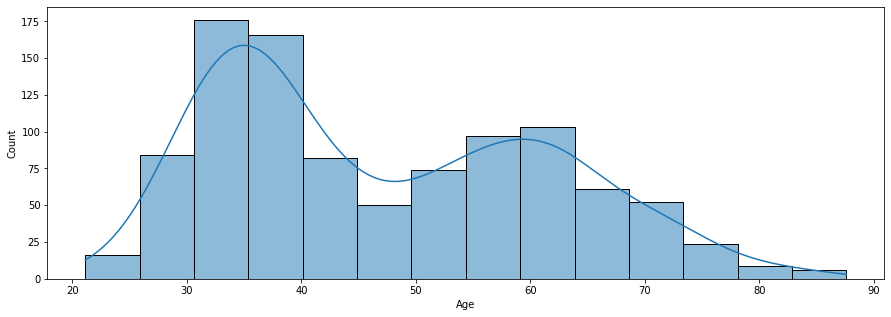

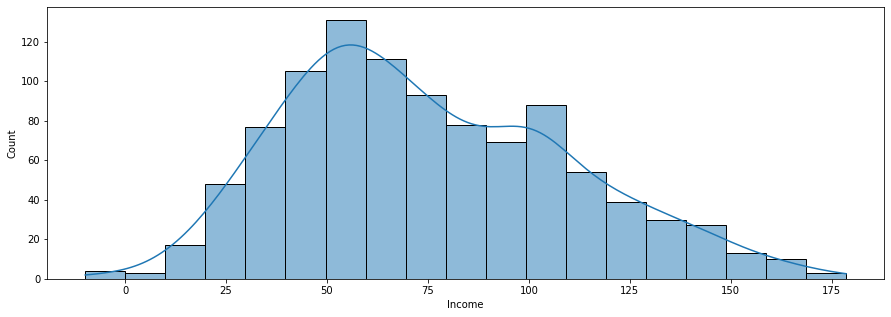

In [62]:
# Let's see distribution by plotting the histograms
plt.figure(figsize=(15, 5))
sns.histplot(data['Age'], kde=True, label='Actual Data')
plt.show()
plt.figure(figsize=(15, 5))
sns.histplot(data['Income'], kde=True, label='Actual Data')
plt.show()

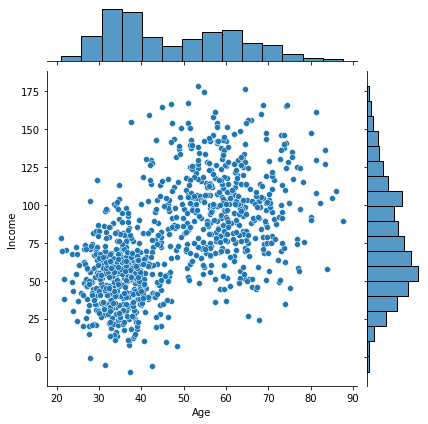

In [44]:
# Plot the synthetic dataset to see the distribution
sns.jointplot(x='Age', y='Income', data=data, kind='scatter')
plt.show()

# How biased sample looks like?

In [45]:
# Creating a 100 biased sample out of 1000 synthetic data
bias = np.random.normal(0, 10, 1000)
age_bias = age + bias
age_sample = age_bias[:100]
income_sample = income[:100]

# Creating a dataframe
data_sample = pd.DataFrame({'Age': age_sample, 'Income': income_sample})
len(data_sample)

100

In [48]:
# To check whether sampled data represents actual data using visualization (Histogram)
def plot_actual_and_processed(actual_data, sampled_data, sampled_label):
    # Plotting the histograms
    plt.figure(figsize=(15, 5))
    sns.histplot(actual_data, kde=True, label='Actual Data')
    sns.histplot(sampled_data, kde=True, label=sampled_label)
    plt.legend()
    plt.show()

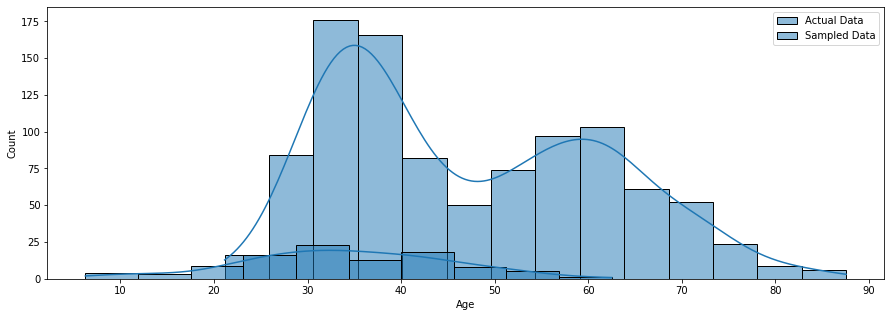

In [49]:
plot_actual_and_processed(actual_data=data['Age'], sampled_data=data_sample['Age'], sampled_label='Sampled Data')

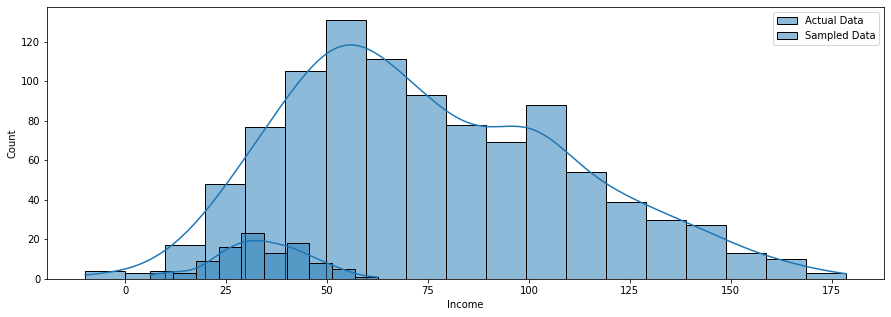

In [63]:
plot_actual_and_processed(actual_data=data['Income'], sampled_data=data_sample['Age'], sampled_label='Sampled Data')


### Issues with sampled data:
- As you can see, the sampled data has a different distribution than the actual data. This is because the sample was taken from the biased data, causing the sample mean to be different from the population mean.

### Let's see the possible solutions:

# Implementing different sampling methods to avoid sampling bias:

## 1. Simple Random Sampling

In [26]:
simple_random_sample = data.sample(n=100, random_state=0)
len(simple_random_sample)

100

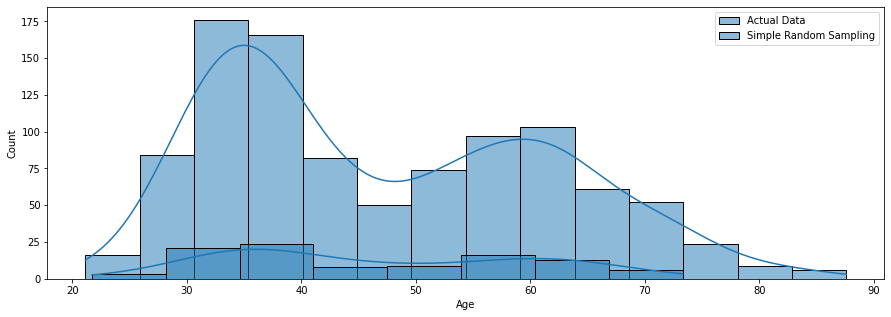

In [51]:
plot_actual_and_processed(actual_data=data['Age'], sampled_data=simple_random_sample['Age'], sampled_label='Simple Random Sampling')

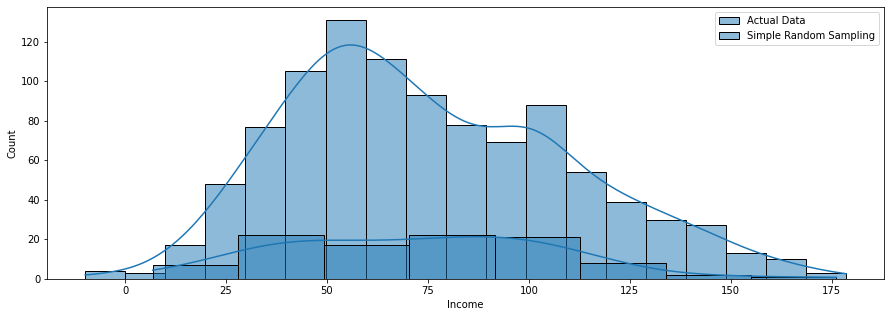

In [64]:
plot_actual_and_processed(actual_data=data['Income'], sampled_data=simple_random_sample['Income'], sampled_label='Simple Random Sampling')

## 2. Systematic Sampling

In [52]:
n = data.shape[0]
k = 100
skip = np.random.randint(0, n - k + 1)
systematic_sample = data.iloc[np.arange(start=skip, stop=skip + k, step=1)]

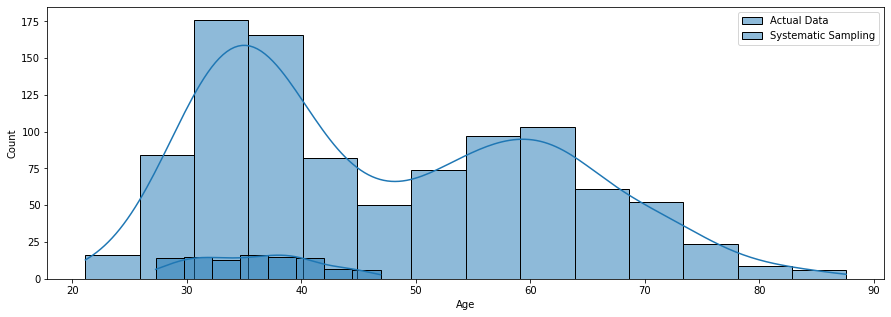

In [53]:
plot_actual_and_processed(data['Age'], systematic_sample['Age'], 'Systematic Sampling')

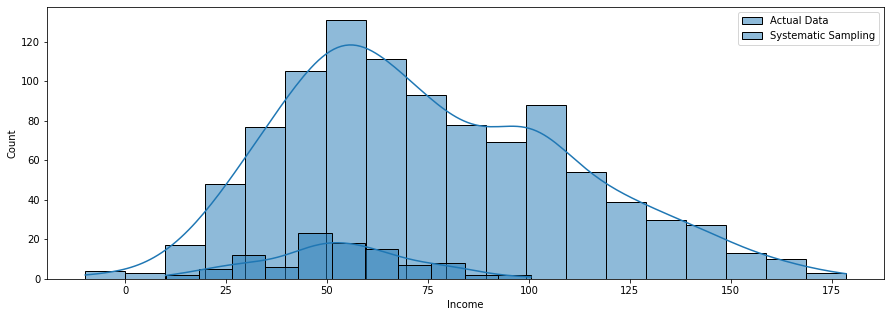

In [65]:
plot_actual_and_processed(data['Income'], systematic_sample['Income'], 'Systematic Sampling')

## 3. Stratified Sampling

In [54]:
age_bins = [30, 40, 50, 60, 70, 80]
data['Age Binned'] = pd.cut(data['Age'], bins=age_bins)
stratified_sample = data.groupby('Age Binned').apply(lambda x: x.sample(n=20, random_state=0))

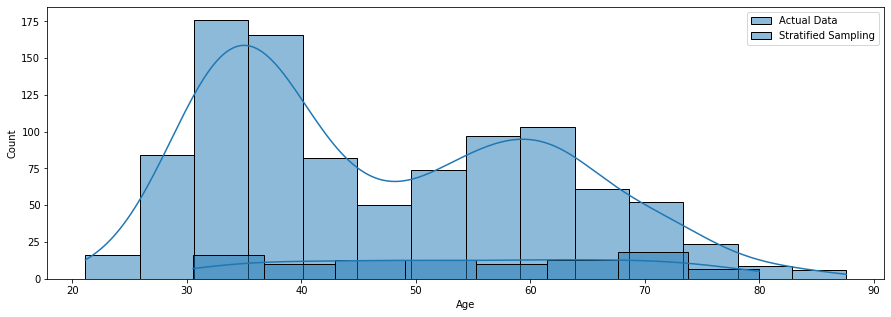

In [55]:
plot_actual_and_processed(data['Age'], stratified_sample['Age'], 'Stratified Sampling')

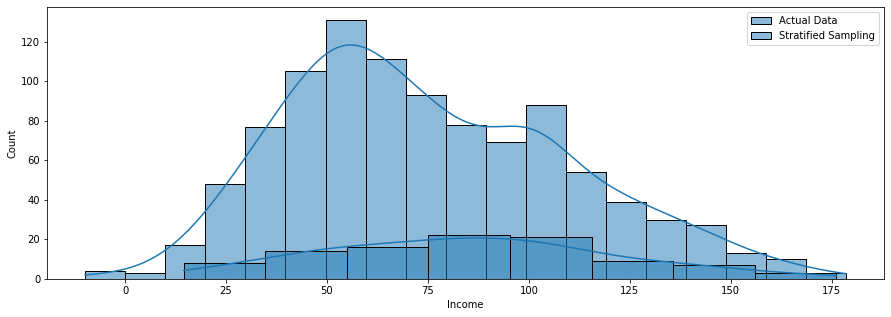

In [66]:
plot_actual_and_processed(data['Income'], stratified_sample['Income'], 'Stratified Sampling')

## 4. Cluster Sampling

In [56]:
cluster_sample = data.groupby(np.random.choice(range(5), size=1000, replace=True)).apply(lambda x: x.sample(n=20, random_state=0))

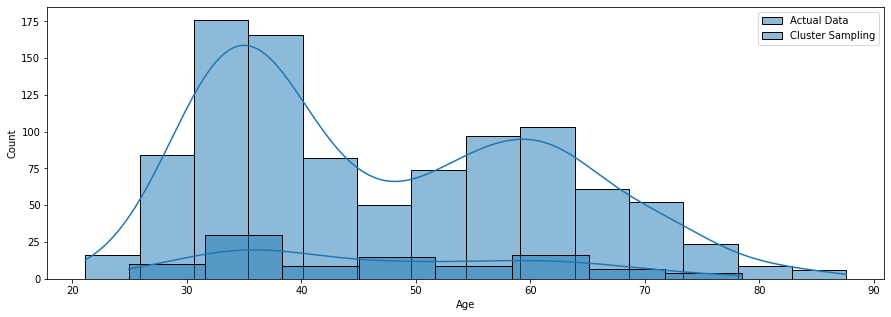

In [57]:
plot_actual_and_processed(data['Age'], cluster_sample['Age'], 'Cluster Sampling')

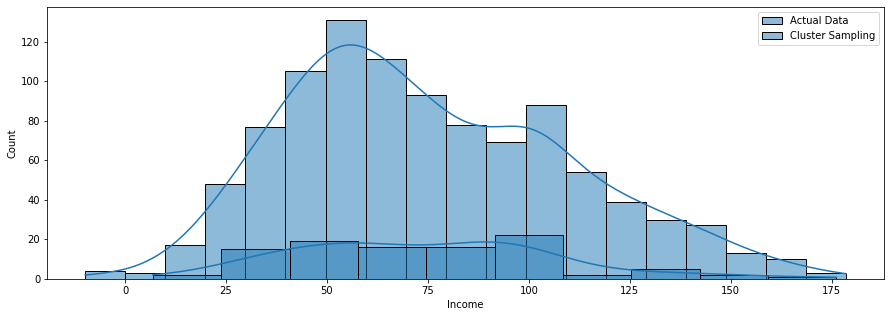

In [67]:
plot_actual_and_processed(data['Income'], cluster_sample['Income'], 'Cluster Sampling')

## 5. Multistage Sampling

In [58]:
first_stage_sample = data.groupby(np.random.choice(range(5), size=1000, replace=True)).apply(lambda x: x.sample(n=150, random_state=0))
second_stage_sample = first_stage_sample.sample(n=100, random_state=0)

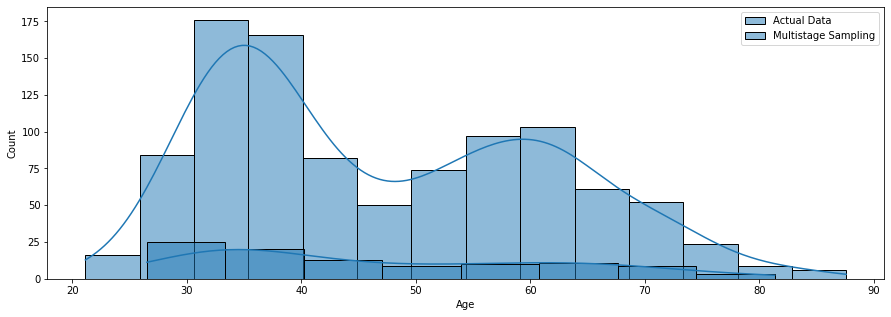

In [59]:
plot_actual_and_processed(data['Age'], second_stage_sample['Age'], 'Multistage Sampling')

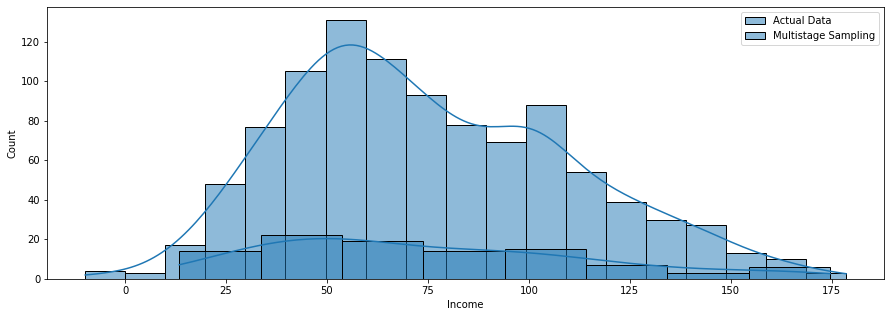

In [68]:
plot_actual_and_processed(data['Income'], second_stage_sample['Income'], 'Multistage Sampling')

# Conclusion

- To avoid sampling bias, it's important to use appropriate sampling methods that ensure that the sample accurately reflects the population of interest. There are several different sampling methods that can be used to avoid sampling bias.
- The choice of sampling method will depend on the goals of the study and the characteristics of the population. Each of these sampling methods has its own advantages and disadvantages and the appropriate method to use depends on the research question, the population being studied, and the resources available. It is important to carefully consider the sampling method used in order to minimize sampling bias and ensure that the sample is representative of the population being studied.
- In this implmentation it can be seen some of the mthods such as cluster Sampling, Multistage Sampling, Startified Sampling performed well compared to other methods.